# Weighted Averaging
## This notebook outlines the Weighted Averaging technique in Ensembling of Machine Learning models

### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Read the dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Split them into categorical and numerical features

In [7]:
cat_df = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']]

In [8]:
num_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [9]:
y_df = df[['Loan_Status']]

### Check missing values in categorical features

<Axes: >

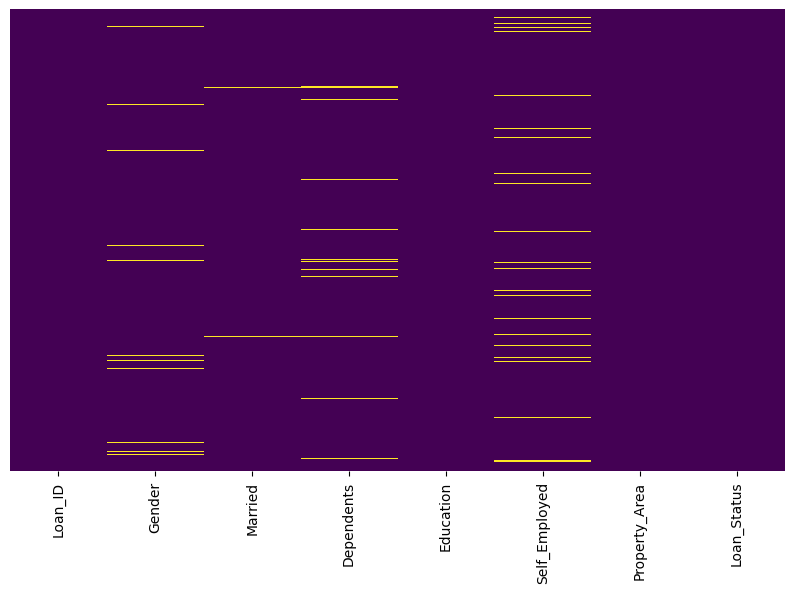

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Imputing Categorical features
- Gender
- Married
- Dependents
- Self_Employed

### Find the most occuring values in the feature

### Gender

In [11]:
cat_df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

### Fill missing values with the most occuring value

In [12]:
cat_df['Gender'].fillna('Male', inplace=True)
cat_df.Gender.value_counts()

C:\Users\derri\AppData\Local\Temp\ipykernel_34944\1754435369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender'].fillna('Male', inplace=True)


Gender
Male      502
Female    112
Name: count, dtype: int64

### Sanity Check

<Axes: >

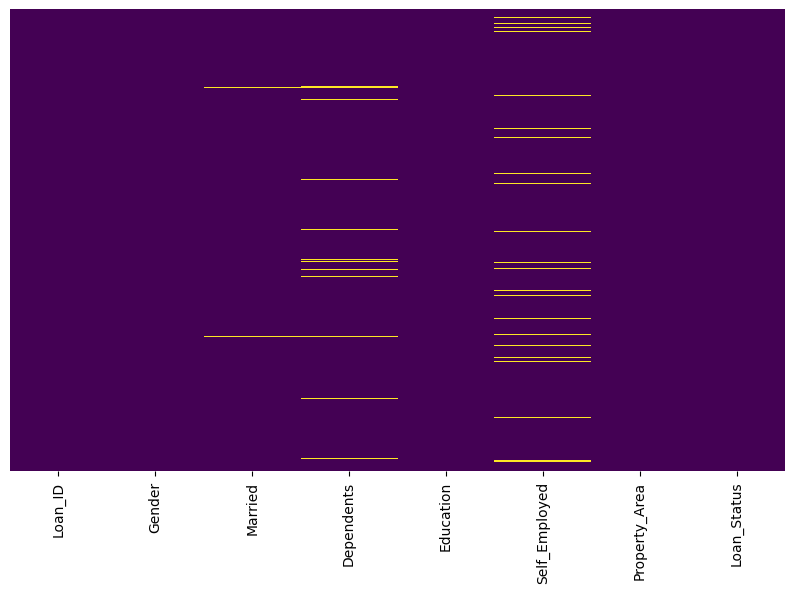

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Married

In [14]:
cat_df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [15]:
cat_df['Married'].fillna("Yes", inplace=True)
cat_df.Married.value_counts()

C:\Users\derri\AppData\Local\Temp\ipykernel_34944\3789398292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Married'].fillna("Yes", inplace=True)


Married
Yes    401
No     213
Name: count, dtype: int64

<Axes: >

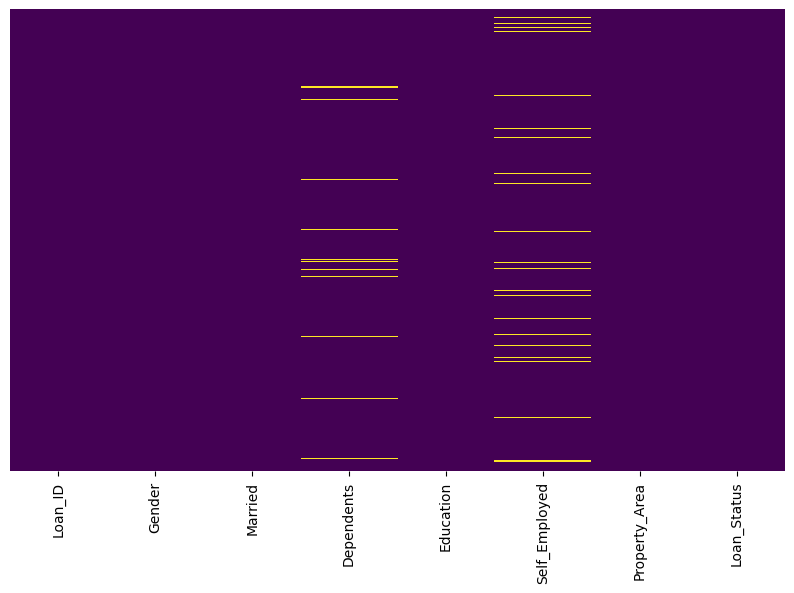

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Dependents

In [17]:
cat_df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [18]:
cat_df['Dependents'].fillna("0", inplace=True)
cat_df.Dependents.value_counts()

C:\Users\derri\AppData\Local\Temp\ipykernel_34944\678841989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Dependents'].fillna("0", inplace=True)


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: >

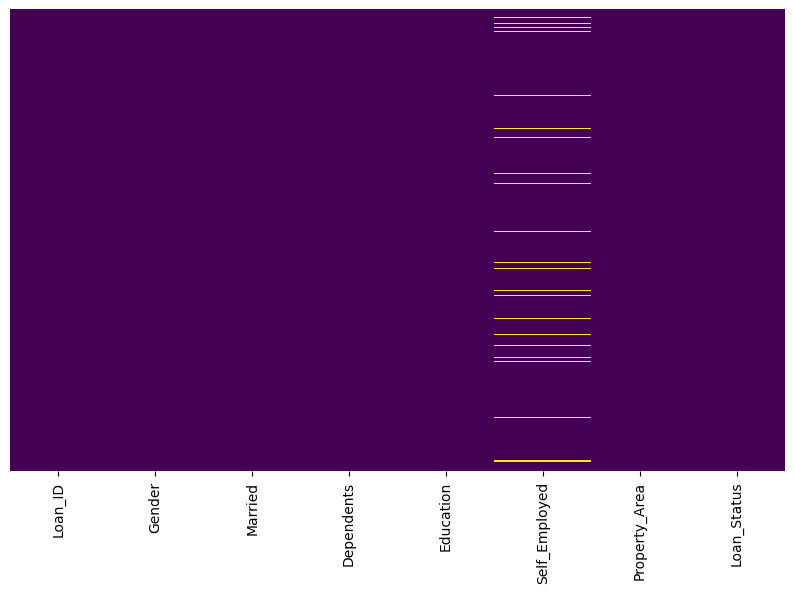

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Self_Employed

In [20]:
cat_df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [21]:
cat_df['Self_Employed'].fillna("No", inplace=True)

C:\Users\derri\AppData\Local\Temp\ipykernel_34944\2406838797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Self_Employed'].fillna("No", inplace=True)


<Axes: >

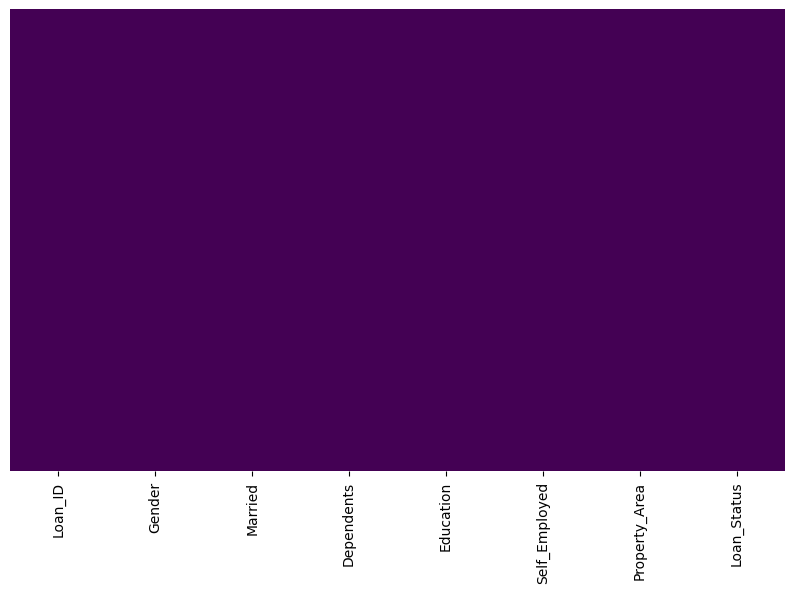

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Checking the missing values in Numerical features

<Axes: >

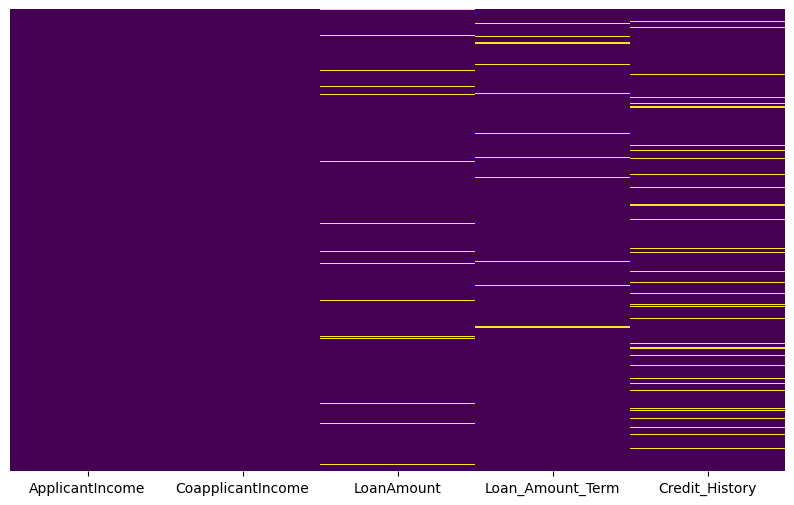

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Impute the missing values forr numerical features

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy='mean')

### Fit on the features

In [26]:
imputer.fit(num_df)

SimpleImputer()

In [27]:
num_df_transform = imputer.transform(num_df)

In [28]:
num_df = pd.DataFrame(data=num_df_transform)
num_df.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


<Axes: >

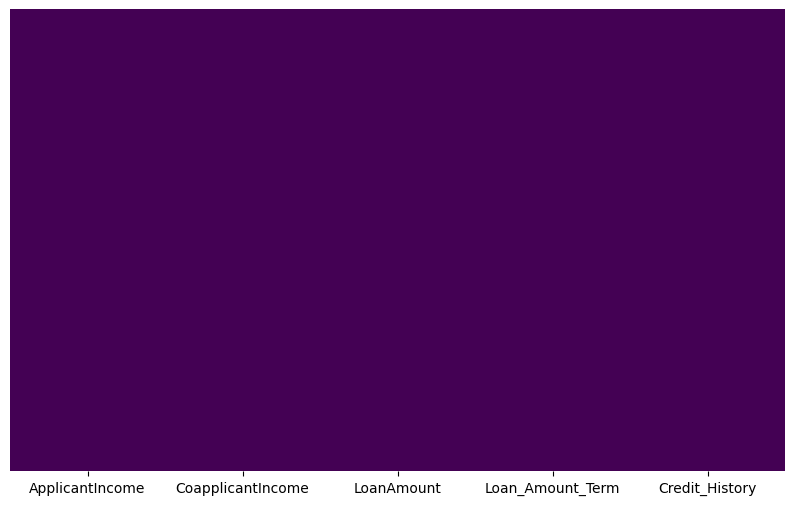

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Convert Categorical features into Numerical features

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()

In [32]:
def clean_dep(x):
    return x[0]

In [33]:
cat_df['Property_Area']= label_encoder.fit_transform(cat_df['Property_Area'])
cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
cat_df['Education']= label_encoder.fit_transform(cat_df['Education']) 
cat_df['Self_Employed']= label_encoder.fit_transform(cat_df['Self_Employed'])
cat_df['Married']= label_encoder.fit_transform(cat_df['Married'])
cat_df['Dependents'] = cat_df['Dependents'].apply(clean_dep)
cat_df['Dependents']= label_encoder.fit_transform(cat_df['Dependents'])
cat_df['Loan_Status']= label_encoder.fit_transform(cat_df['Loan_Status'])
cat_df

C:\Users\derri\AppData\Local\Temp\ipykernel_34944\2185607541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Property_Area']= label_encoder.fit_transform(cat_df['Property_Area'])
C:\Users\derri\AppData\Local\Temp\ipykernel_34944\2185607541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
C:\Users\derri\AppData\Local\Temp\ipykernel_34944\2185607541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,2,1
1,LP001003,1,1,1,0,0,0,0
2,LP001005,1,1,0,0,1,2,1
3,LP001006,1,1,0,1,0,2,1
4,LP001008,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,0,1
610,LP002979,1,1,3,0,0,0,1
611,LP002983,1,1,1,0,0,2,1
612,LP002984,1,1,2,0,0,2,1


In [34]:
cat_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
cat_df = cat_df.drop('Loan_ID', axis=1)
cat_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


### Concatenate the numerical features and categorical features

In [36]:
df_transform = pd.concat([cat_df, num_df], axis=1)
df_transform

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.000000,360.0,1.0


### Sanity check
- Check for missing values
- Check for categorical features

<Axes: >

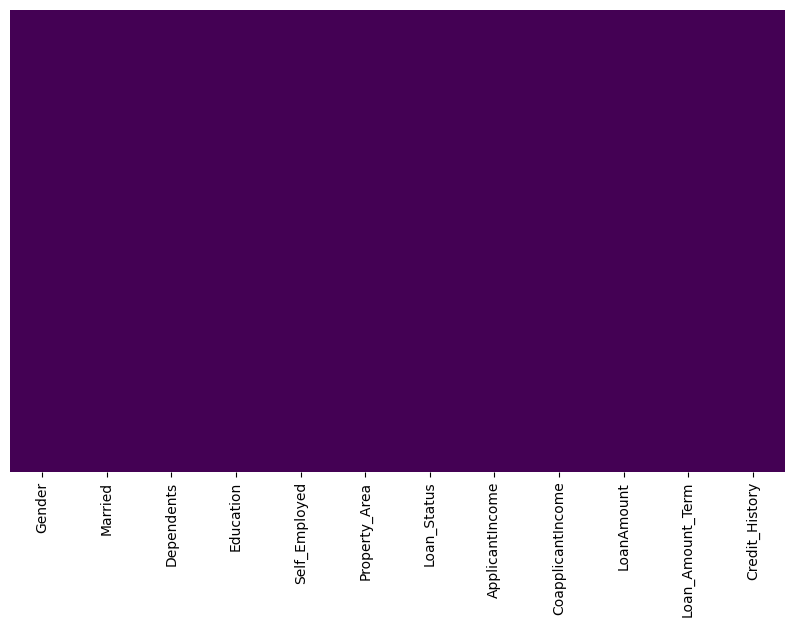

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [38]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   Property_Area      614 non-null    int32  
 6   Loan_Status        614 non-null    int32  
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


### Split them into X and y

In [39]:
df_transform

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.000000,360.0,1.0


In [40]:
X = df_transform.drop('Loan_Status', axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [41]:
y = df_transform['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [42]:
X.shape, y.shape

((614, 11), (614,))

### Import the libraries

In [43]:
import pandas as pd

### Load the dataset
https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_prediction.csv

In [44]:
df = pd.read_csv('data/loan_prediction.csv')

### Split into X and y

In [45]:
X = df.drop('Loan_Status', axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [46]:
y = df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Split dataset into train and test


In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((429, 11), (185, 11), (429,), (185,))

### Import the models
- Logistic Regression
- KNN
- Decision Tree

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Build 3 models

In [49]:
model1 = LogisticRegression(random_state=1)
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(random_state=1)

### Fit the models

In [50]:
model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)
model3.fit(xtrain,ytrain)

c:\Users\derri\OneDrive\Documents\gbc\Machin-Learning-I\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=1)

### Get the predictions of all models

In [51]:
pred1 = model1.predict(xtest)
pred2 = model2.predict(xtest)
pred3 = model3.predict(xtest)

### Weighted Averaging
- Model 1: 0.3
- Model 2: 0.3
- Model 3: 0.4

In [54]:
final_prediction = 0.3*pred1+0.3*pred2+0.4*pred3
final_prediction

array([1. , 1. , 1. , 0.6, 1. , 0.3, 0.3, 0.7, 0.3, 0.7, 1. , 1. , 1. ,
       1. , 1. , 1. , 0. , 1. , 1. , 0.3, 0.3, 1. , 1. , 0.3, 1. , 1. ,
       0.3, 1. , 0.3, 0. , 1. , 0.7, 1. , 1. , 1. , 0.3, 0.6, 1. , 0.7,
       1. , 1. , 0.3, 1. , 1. , 1. , 0.7, 1. , 0.7, 0.6, 1. , 1. , 0.7,
       0.7, 1. , 0.7, 0.6, 1. , 0.3, 1. , 1. , 0.3, 0.6, 1. , 0. , 0.6,
       1. , 1. , 1. , 0.6, 0.7, 1. , 1. , 1. , 0.3, 1. , 1. , 0. , 0.3,
       1. , 0.3, 0.7, 1. , 1. , 1. , 1. , 0.6, 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 0.7, 1. , 0.3, 0.6, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0.7, 1. , 1. , 0.7, 0.7, 1. , 1. , 0.3, 0.3, 1. ,
       1. , 1. , 0.7, 1. , 0. , 0.6, 1. , 0.3, 0.3, 1. , 0.6, 1. , 0.7,
       0.7, 0.7, 1. , 1. , 1. , 0.7, 1. , 0.7, 0.7, 0.7, 0.6, 1. , 0.3,
       1. , 1. , 1. , 1. , 1. , 0. , 0.3, 1. , 0.7, 1. , 0.3, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0.7, 1. , 0.6, 1. , 1. , 0.6, 0.7, 0.7,
       1. , 0. , 0.6, 1. , 1. , 1. , 1. , 0.6, 1. , 0.7, 0.7, 0.